In [1]:
from qiskit import *

In [2]:
circuit = QuantumCircuit(3,3)
# QUBIT ORDERING
# q0 = State |psi> that we want to teleport
# q1 = Alice's half of the Bell pair
# q2 = Bob's half of the Bell pair, the destination of the teleportation

# ========================
# Step 0: Create the state to be teleported in qubit 0
circuit.x(0) # qubit 0 is now in state |1>, and this is the state that we want to teleport

circuit.barrier() # just a visual aid

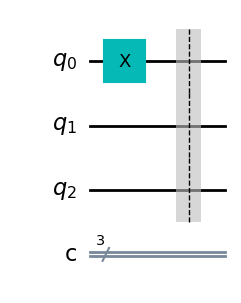

In [3]:
circuit.draw(output="mpl")

In [4]:
# ========================
# Step 1: create an entangled Bell pair between Alice and Bob (qubits 1 and 2)
circuit.h(1)
circuit.cx(1,2)

circuit.barrier() # just a visual aid

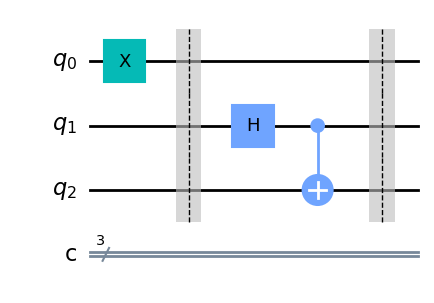

In [5]:
circuit.draw(output="mpl")

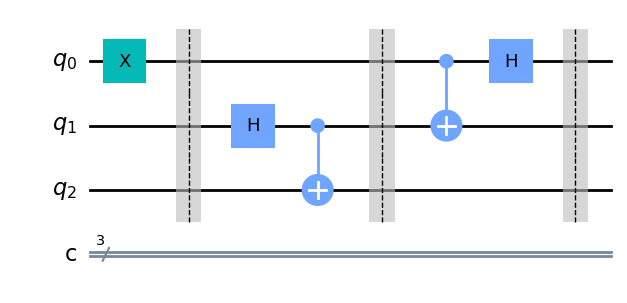

In [6]:
# ========================
# Step 2: Alice applies a series of operations 
# between the state to teleport (qubit 0) and her half of the Bell pair (qubit 1)
circuit.cx(0,1)
circuit.h(0)

circuit.barrier() # just a visual aid
circuit.draw(output="mpl")

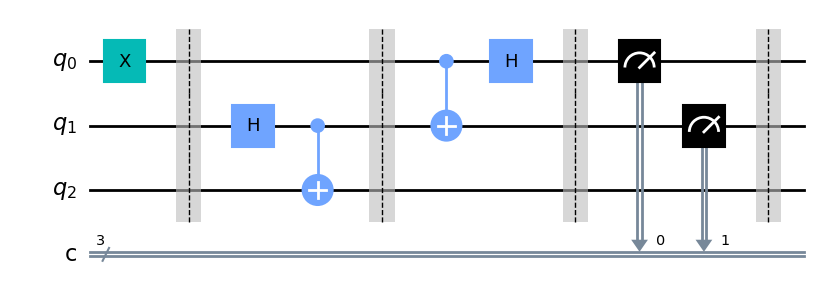

In [7]:
# ========================
# Step 3: Alice measures both qubits 0 and 1
circuit.measure([0, 1], [0, 1]) # results stored in classical bits 0 and 1, respectively

circuit.barrier() # just a visual aid
circuit.draw(output="mpl")

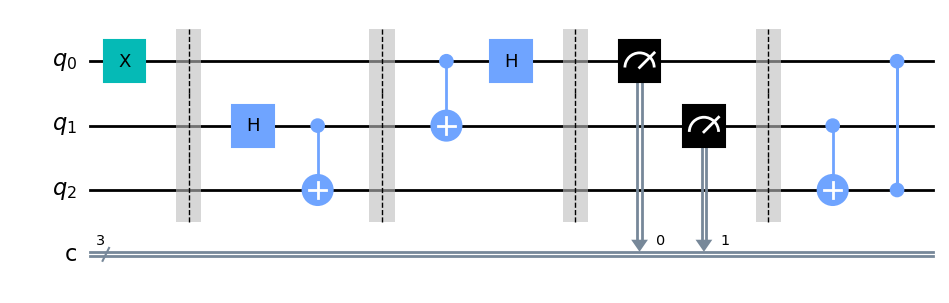

In [8]:
# ========================
# Step 4: Now that Alice has measured the two qubits, their states have collapsed to 0 and 1. 
# Bob can do operations conditioned on these qubits to his half of the Bell pair
# Note that while we're conditioning Bob's operation on the collapsed qubits 0 and 1, we can
# do teleportation over long distances by transmitting the classical information in classical bits 0 and 1
circuit.cx(1, 2)
circuit.cz(0, 2)

circuit.draw(output="mpl")

# Running the quantum teleportation circuit

In [9]:
# Step 5: Done! Measure Bob's qubit to find out what state it is in
# We are measuring from qubit 2 and collecting the output from classical bit 2
circuit.measure([2], [2])

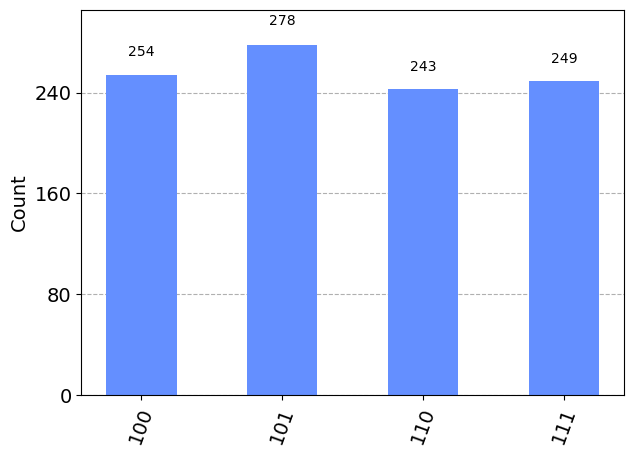

In [10]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

Note that the results above are ordered as c2c1c0, with the bottom-most bit being c2, which was the result of measuring the state in qubit 2. As you can see, the result is always c2 = 1since we teleported the state |1> to qubit 2.